## 教師あり学習
Pythonで始める機械学習 p30~

In [113]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

In [111]:
# 　データセットの作成
X, y = mglearn.datasets.make_forge()

Text(0,0.5,'Second feature')

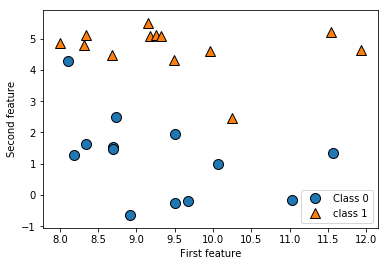

In [70]:
# データをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

In [71]:
print("X.shape: {}".format(X.shape))
# 26個のサンプルと、二種類の特徴量をもつ

X.shape: (26, 2)


### waveデータをプロット

In [72]:
X, y = mglearn.datasets.make_wave(n_samples=40)

Text(0,0.5,'Target')

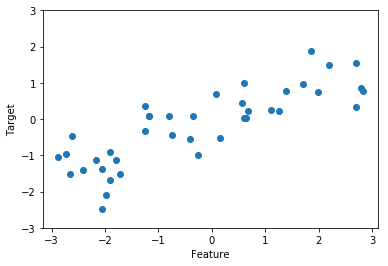

In [73]:
# X軸に特徴量
# Y軸に、ターゲット
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [74]:
from sklearn.datasets import load_breast_cancer

In [75]:
cancer = load_breast_cancer()

In [76]:
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [77]:
# 569サンプル、30の特徴量
print("shape of cancer data: {}".format(cancer.data.shape))

shape of cancer data: (569, 30)


In [78]:
# 212が悪性、357が良性# np.bincount(cancer.target)で、cancer.targetの[0 1]の数を数えて出力してくれる
# => array([212, 357])
print("sample count per class: {}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

sample count per class: {'malignant': 212, 'benign': 357}


In [79]:
# 個々の特徴量を表示する
print("feature names: {}".format(cancer.feature_names))

feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [80]:
# 実世界の書きデータセットとして、ボストンの家賃データを取得する
from sklearn.datasets import load_boston

In [81]:
boston = load_boston()

In [82]:
print("data shape: {}".format(boston.data.shape))

data shape: (506, 13)


## 特徴量エンジニアリング
上のデータだけをみると、506のサンプルと、13の特徴量がある
13の特徴量だけをみるのではなく、特徴量間の積（交互作用）もみること

In [83]:
X, y = mglearn.datasets.load_extended_boston()

In [84]:
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## k-最近傍法

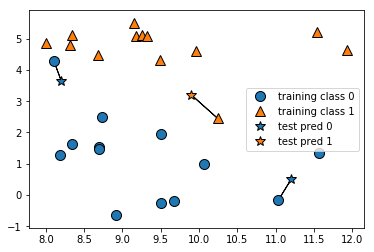

In [86]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

星印（3つ）が予測データ
それぞれに対して、訓練データのうちで最も近いものに印が付いている。
これは、近傍点が1の場合なので、１つしか印がついていない



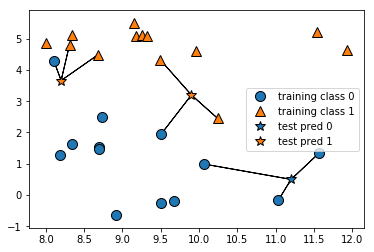

In [87]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

近傍点3つにした場合、訓練データの中から３つ近いデータに印をつける
多く印がついたクラスが、その予測データのクラスになる。

In [88]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [91]:
X_train.shape

(19, 2)

In [92]:
X_test.shape


(7, 2)

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
clf = KNeighborsClassifier(n_neighbors=3)

In [96]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [97]:
# テストデータに対して予測を行う
# 訓練セットの中から最近傍点を見つけ出し、最も多い近傍点を計算する
print("test set prediction: {}".format(clf.predict(X_test)))

test set prediction: [1 0 1 0 1 0 0]


予測結果がでた。

In [99]:
clf.score(X_test, y_test)

0.8571428571428571

## KNighborsClassifierの解析

分類の決定境界を描写する

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

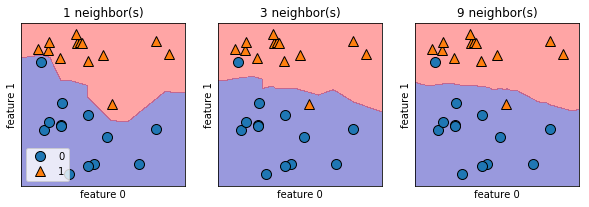

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) # 全てのデータを使う
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")    

axes[0].legend(loc=3)

左から、近傍点1, 3, 9のグラフになっている
近傍点が少ないと、決定境界が訓練データに近くなる
近傍点が多いと、決定境界は滑らかになる
### 滑らかな境界は、単純なモデルに対応する
### 近傍点が少ない場合は、複雑度の高いモデルに対応する

## cancerデータで確認する（実世界のデータ）

In [123]:
from sklearn.datasets import load_breast_cancer

In [124]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [132]:
training_accurate = []
test_accurate = []

In [133]:
neighbors_settings = range(1, 11) # 1 ~ 10まで近傍点を試す

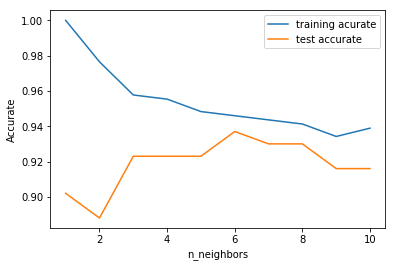

In [134]:
for n in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    # 訓練セットの精度を記録
    training_accurate.append(clf.score(X_train, y_train))
    # 汎用精度を記録
    test_accurate.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accurate, label="training acurate")
plt.plot(neighbors_settings, test_accurate, label="test accurate")
plt.ylabel("Accurate")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
上の結果をみると、最良の性能は、近傍点6あたりにあることがわかる。
